# Assessing the final model

In [1]:
import pandas as pd
from eli5.sklearn import PermutationImportance
import joblib 
from Functions import *

/opt/homebrew/anaconda3/envs/py310/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


In [2]:
buffer_size_m=400

### Load the fitted model

In [3]:
rf_model_pipeline1 = joblib.load('Results/FinalModels/rf_model_pipeline1_{}_outlierremovaleachsensor.pkl'.format(buffer_size_m))
# rf_model_pipeline2 = joblib.load('Results/FinalModels/rf_model_pipeline2_{}.pkl'.format(buffer_size_m))
# rf_model_pipeline3 = joblib.load('Results/rf_model_pipeline3_combined_features.fit.sav')

### Load the data used to fit model

In [4]:
Xfull = pd.read_csv('Results/FinalModels/Xfull_rf_model_pipeline1_{}_outlierremovaleachsensor.csv'.format(buffer_size_m))
Yfull = pd.read_csv('Results/FinalModels/Yfull_rf_model_pipeline1_{}_outlierremovaleachsensor.csv'.format(buffer_size_m))
Yfull = Yfull["0"].to_numpy()

### Find Gini impurity feature importances
Gini feature importance (or mean decrease in impurity) counts the number of times a feature is used to split a node, weighted by the number of samples it splits.

In [5]:
len(Xfull.columns)    
# rf_importances = list(rf_model_pipeline1['rf_regressor'].feature_importances_)
# len(rf_importances)
# rf_importances
# rf_feature_importances = pd.DataFrame({'feature': Xfull.columns,'importance':rf_importances})   

72

In [6]:
gi_1 = find_gini_importance(Xfull,rf_model_pipeline1['rf_regressor'])    
# gi_2 = find_gini_importance(Xfull,rf_model_pipeline2['rf_regressor'])   
# gi_3 = find_gini_importance(Xfull,rf_model_pipeline3['rf_regressor'])   

### Find the permutation importances

In [7]:
pi_1, pi_1_raw = find_permutation_importance(rf_model_pipeline1['rf_regressor'], Xfull, Yfull, n_iter=3)    
# pi_2, pi_2_raw = find_permutation_importance(rf_model_pipeline2['rf_regressor'], Xfull, Yfull, n_iter=3)     
# pi_3, pi_3_raw = find_permutation_importance(rf_model_pipeline3['rf_regressor'], Xfull, Yfull, n_iter=3)  

### Plot and compare feature importances

In [8]:
# cardinality_df = pd.DataFrame({'feature':Xfull.columns, 'n_features':Xfull.nunique()})
# cardinality_df = cardinality_df.merge(pi_1, on='feature', how='outer')
# cardinality_df = cardinality_df.drop([0,1,2,4, 45])
# plt.scatter(cardinality_df['n_features'], cardinality_df['importance'])
# # plt.scatter(cardinality_df[:-2]['n_features'], cardinality_df[:-2]['importance'])
# # cardinality_df

In [9]:
# fig, axs = plt.subplots(ncols = 2, figsize=(15,15), constrained_layout=True)
# plot_compare_importances(axs, gi_1, pi_1, log_scale = True, above_random_cat='random_cat')   
# fig.savefig("Results/Figs/AssessingFinalModel/FeatureImportances_log.PNG")
# # fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# plot_compare_importances(axs, gi_2, pi_2, above_random_cat='random_cat')   

# fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# plot_compare_importances(axs, gi_3, pi_3, above_random_cat='random_cat')   

In [10]:
# fig, axs = plt.subplots(ncols = 2, figsize=(15,15), constrained_layout=True)
# plot_compare_importances(axs, gi_1, pi_1, log_scale = False, above_random_cat='random_cat')   
# fig.savefig("Results/Figs/AssessingFinalModel/FeatureImportances.PNG")
# # fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# # plot_compare_importances(axs, gi_2, pi_2, above_random_cat='random_cat')   

# # fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# # plot_compare_importances(axs, gi_3, pi_3, above_random_cat='random_cat')   

#### Think if score is negative it implies that randomly shuffled version of the variable scored better than the real variable (so doesn't imply improtance)

In [11]:
pi_1_above= pi_1[pi_1['importance']>0.000001]
# pi_1_above
pi_1_aboverandom = pi_1[pi_1['importance']>=pi_1[pi_1['feature'] == 'random_cat']['importance'].reset_index(drop=True)[0]]

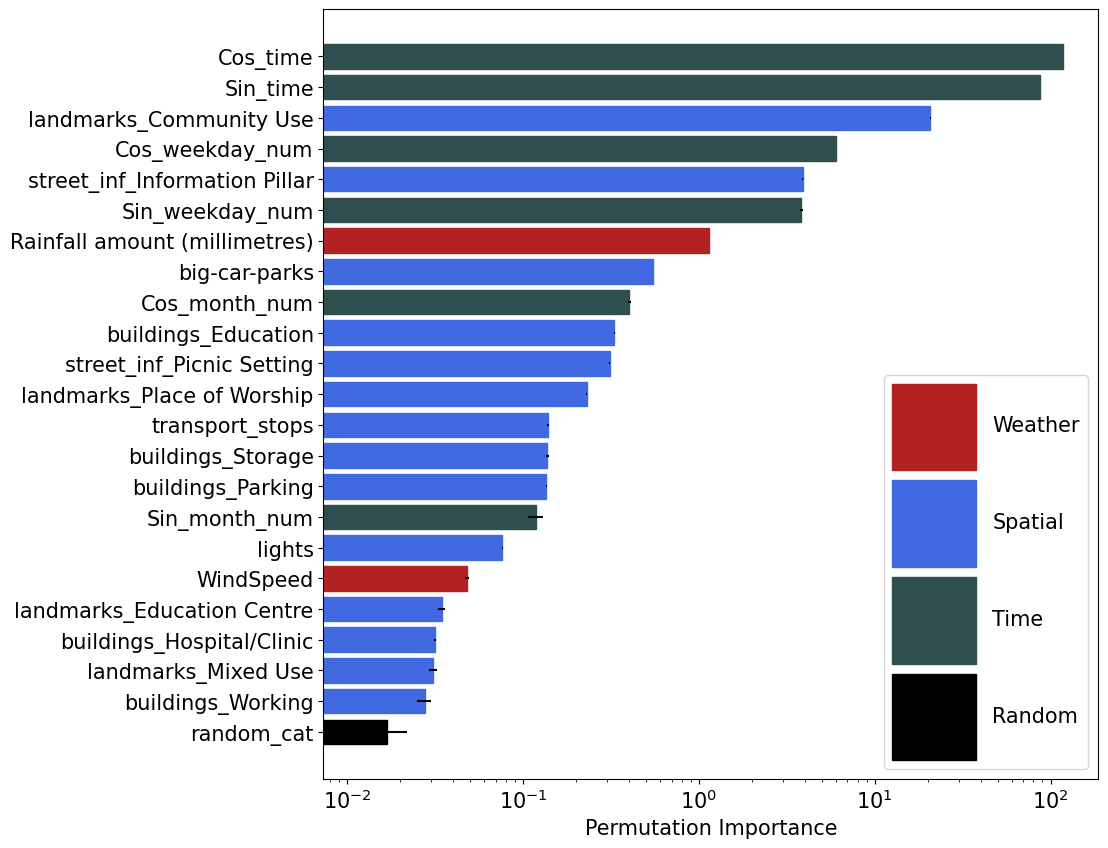

In [16]:
fig, ax=plt.subplots(figsize=(10,10))
ax.barh(range(len(pi_1_aboverandom['importance'])),pi_1_aboverandom['importance'],xerr=pi_1_aboverandom['Feature_importance_std'])
ax.set_yticks(range(len(pi_1_aboverandom['importance'])))
_ = ax.set_yticklabels(pi_1_aboverandom['feature'])  
# ax.set_title('Permutation importance')
ax.set_xscale('log')
ax.set_xlabel('Permutation Importance', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)


# loop over patches (bars) and set colors individually
for color, bar in zip(['black','royalblue','royalblue','royalblue', 'royalblue', 'firebrick', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue',
                       'darkslategrey', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 
                       'darkslategrey', 'royalblue', 'firebrick', 'royalblue', 'royalblue',
                      'darkslategrey', 'darkslategrey', 'royalblue', 'darkslategrey', 'darkslategrey'], ax.patches):
    bar.set_color(color)


import matplotlib.patches as mpatches
colors = ['firebrick', 'royalblue', 'darkslategrey', 'black']
labels = ['Weather', 'Spatial', 'Time', 'Random']
patches_list = []
for i, color in  enumerate(colors):
    patch =  mpatches.Patch(color=color, label=labels[i])
    patches_list.append(patch)  
ax.legend(handles=patches_list, handleheight=6, handlelength=4, fontsize =15);

plt.show()

fig.savefig("Results/FinalModels/FeatureImportance/FeatureImportances_log_removelittlevalues.PNG", bbox_inches='tight')